# Correlation between values of LIWC features

Inspect the correlation between extreme values of LIWC features. First: load the data:

In [1]:
import csv
import re
import sys

DIRECTORY = "/home/erikt/projects/e-mental-health/usb/releases/20191203-tinka"
FILE = "file"
FROM = "from"
INFILE = "liwc-all.csv"
SEPARATOR = ","
COUNSELOR = "COUNSELOR"
CLIENT = "CLIENT"

inFile = open(DIRECTORY+"/"+INFILE,"r")
csvreader = csv.DictReader(inFile,delimiter=SEPARATOR)
dataOut = {}
for row in csvreader:
    file = row[FILE]
    sender = row[FROM]
    if not file in dataOut: dataOut[file] = {}
    for key in dict(row):
        if re.match("^[0-9].*$",key): 
            if not key in dataOut[file]: dataOut[file][key] = {}
            if not sender in dataOut[file][key] or float(row[key]) > dataOut[file][key][sender]: 
                dataOut[file][key][sender] = float(row[key])
inFile.close()

Make a graph for the first therapy session (AdB0001). LIWC features printed above the dashed line are used more frequently by counselors than by clients (for example "6 you"). Features printed below the line are used more frequently in mails written by clients. The feature "1 funcion" is omitted because its outlier absolute value (0.8) distorts the graph. The graph uses the maximum feature values of the client and the counselor in a session.

<IPython.core.display.Javascript object>


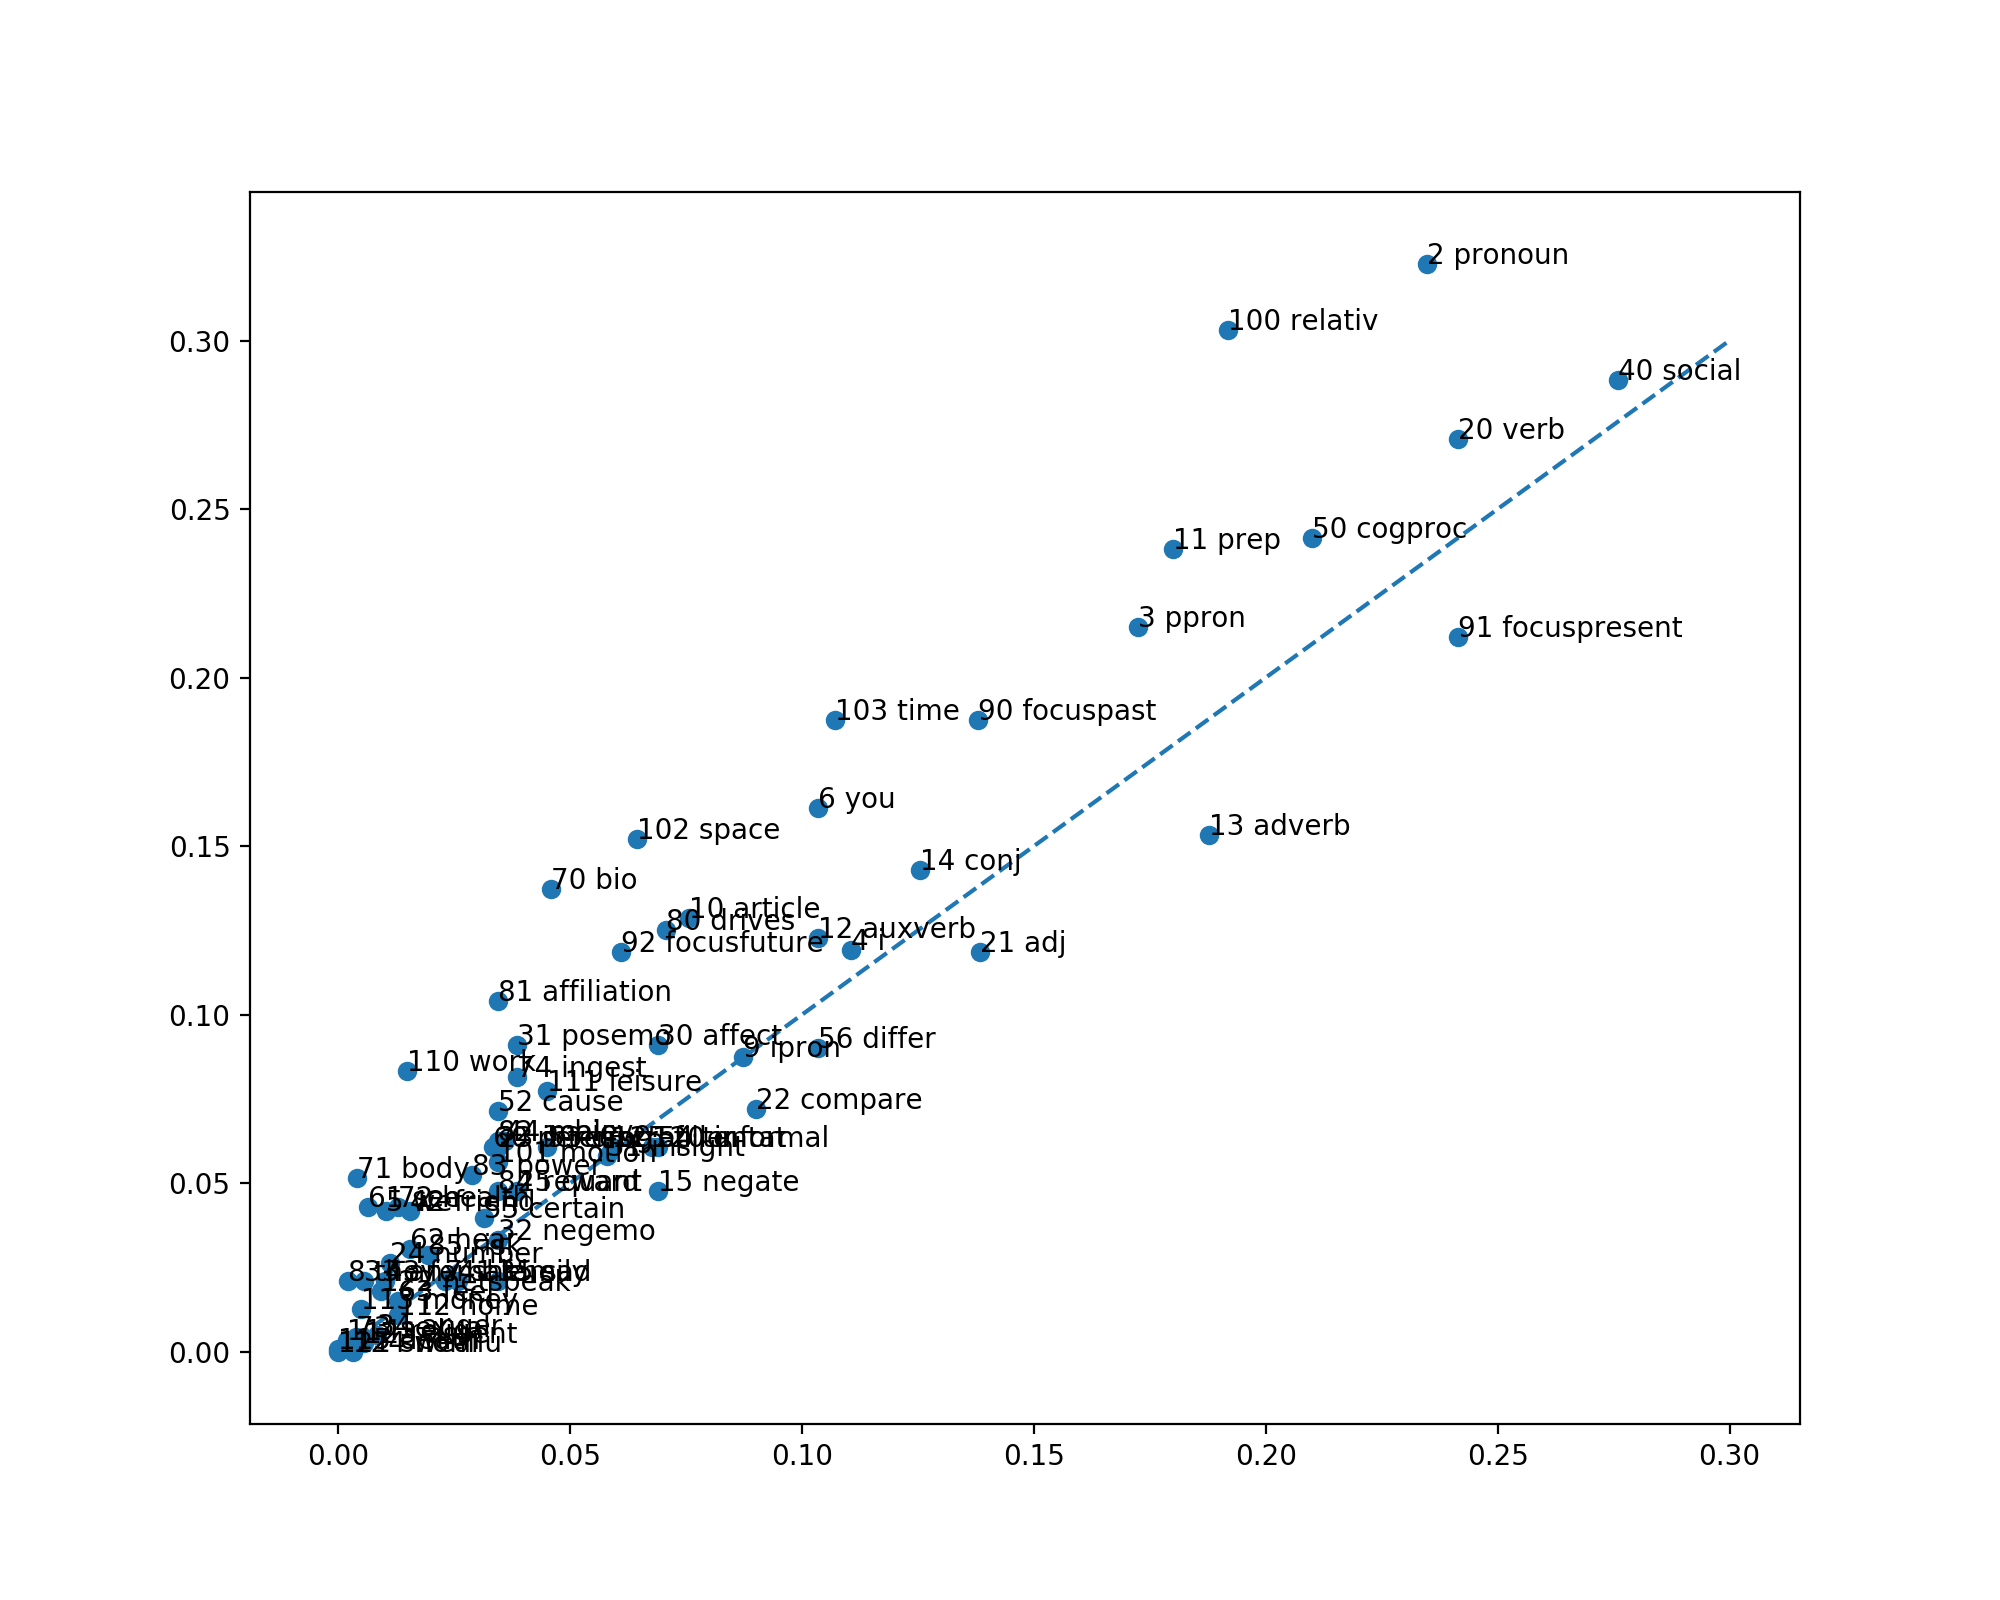

[]

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

file = "AdB0001"
counselor = {f:dataOut[file][f][COUNSELOR] for f in dataOut[file] if not re.match("^1 .*$",f)}
client = {f:dataOut[file][f][CLIENT] for f in dataOut[file] if not re.match("^1 .*$",f)}
fig,ax = plt.subplots(figsize=(10, 8))
ax.scatter(client.values(),counselor.values())
for key in client:
    ax.annotate(key,[client[key],counselor[key]])
x = np.linspace(0,0.3, 1000)
plt.plot(x, x, linestyle='dashed')
plt.rc({'font':{"size":"14"}})
plt.plot()

Make a similar graph for a single feature (4 i) but involving all therapy sessions which contain both counselor and client mails.

<IPython.core.display.Javascript object>


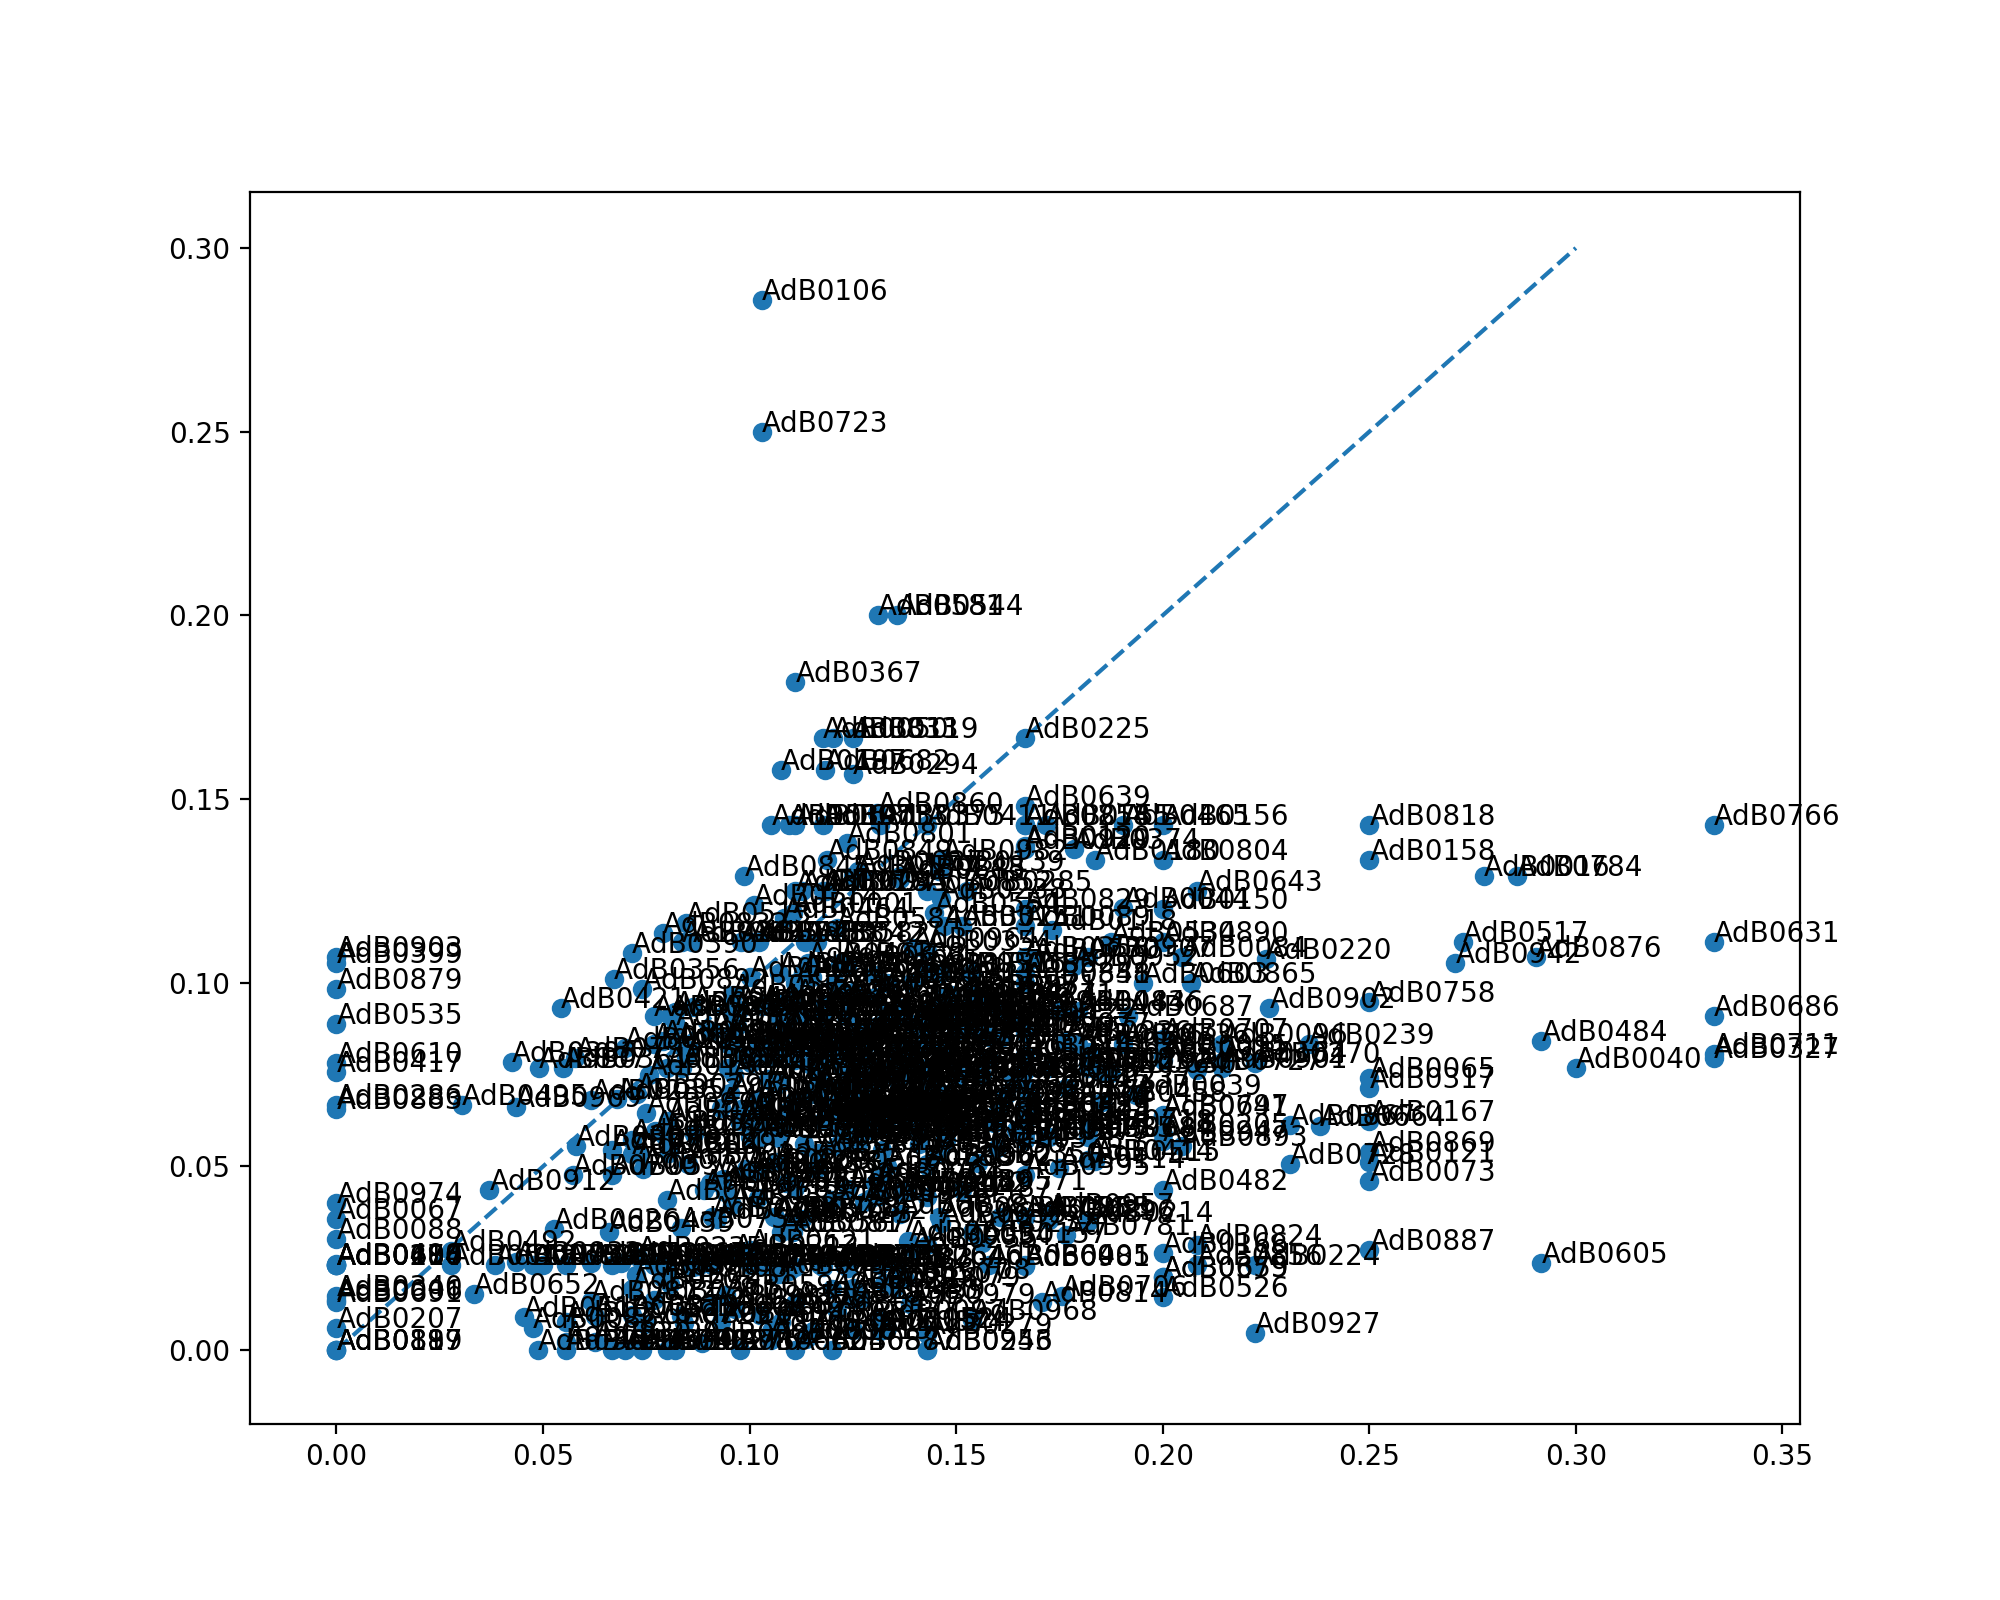

[]

In [3]:
feature = "4 i"
counselor = {c:dataOut[c][feature][COUNSELOR] for c in dataOut  if CLIENT in dataOut[c][feature]}
client = {c:dataOut[c][feature][CLIENT] for c in dataOut if CLIENT in dataOut[c][feature]}
fig,ax = plt.subplots(figsize=(10, 8))
ax.scatter(client.values(),counselor.values())
for key in client:
    ax.annotate(key,[client[key],counselor[key]])
plt.plot(x, x, linestyle='dashed')
plt.rc({'font':{"size":"14"}})
plt.plot()

Show the median feature values measured over all clients and counselor. Note that the two values used for a feature may come from different therapy sessions.

<IPython.core.display.Javascript object>


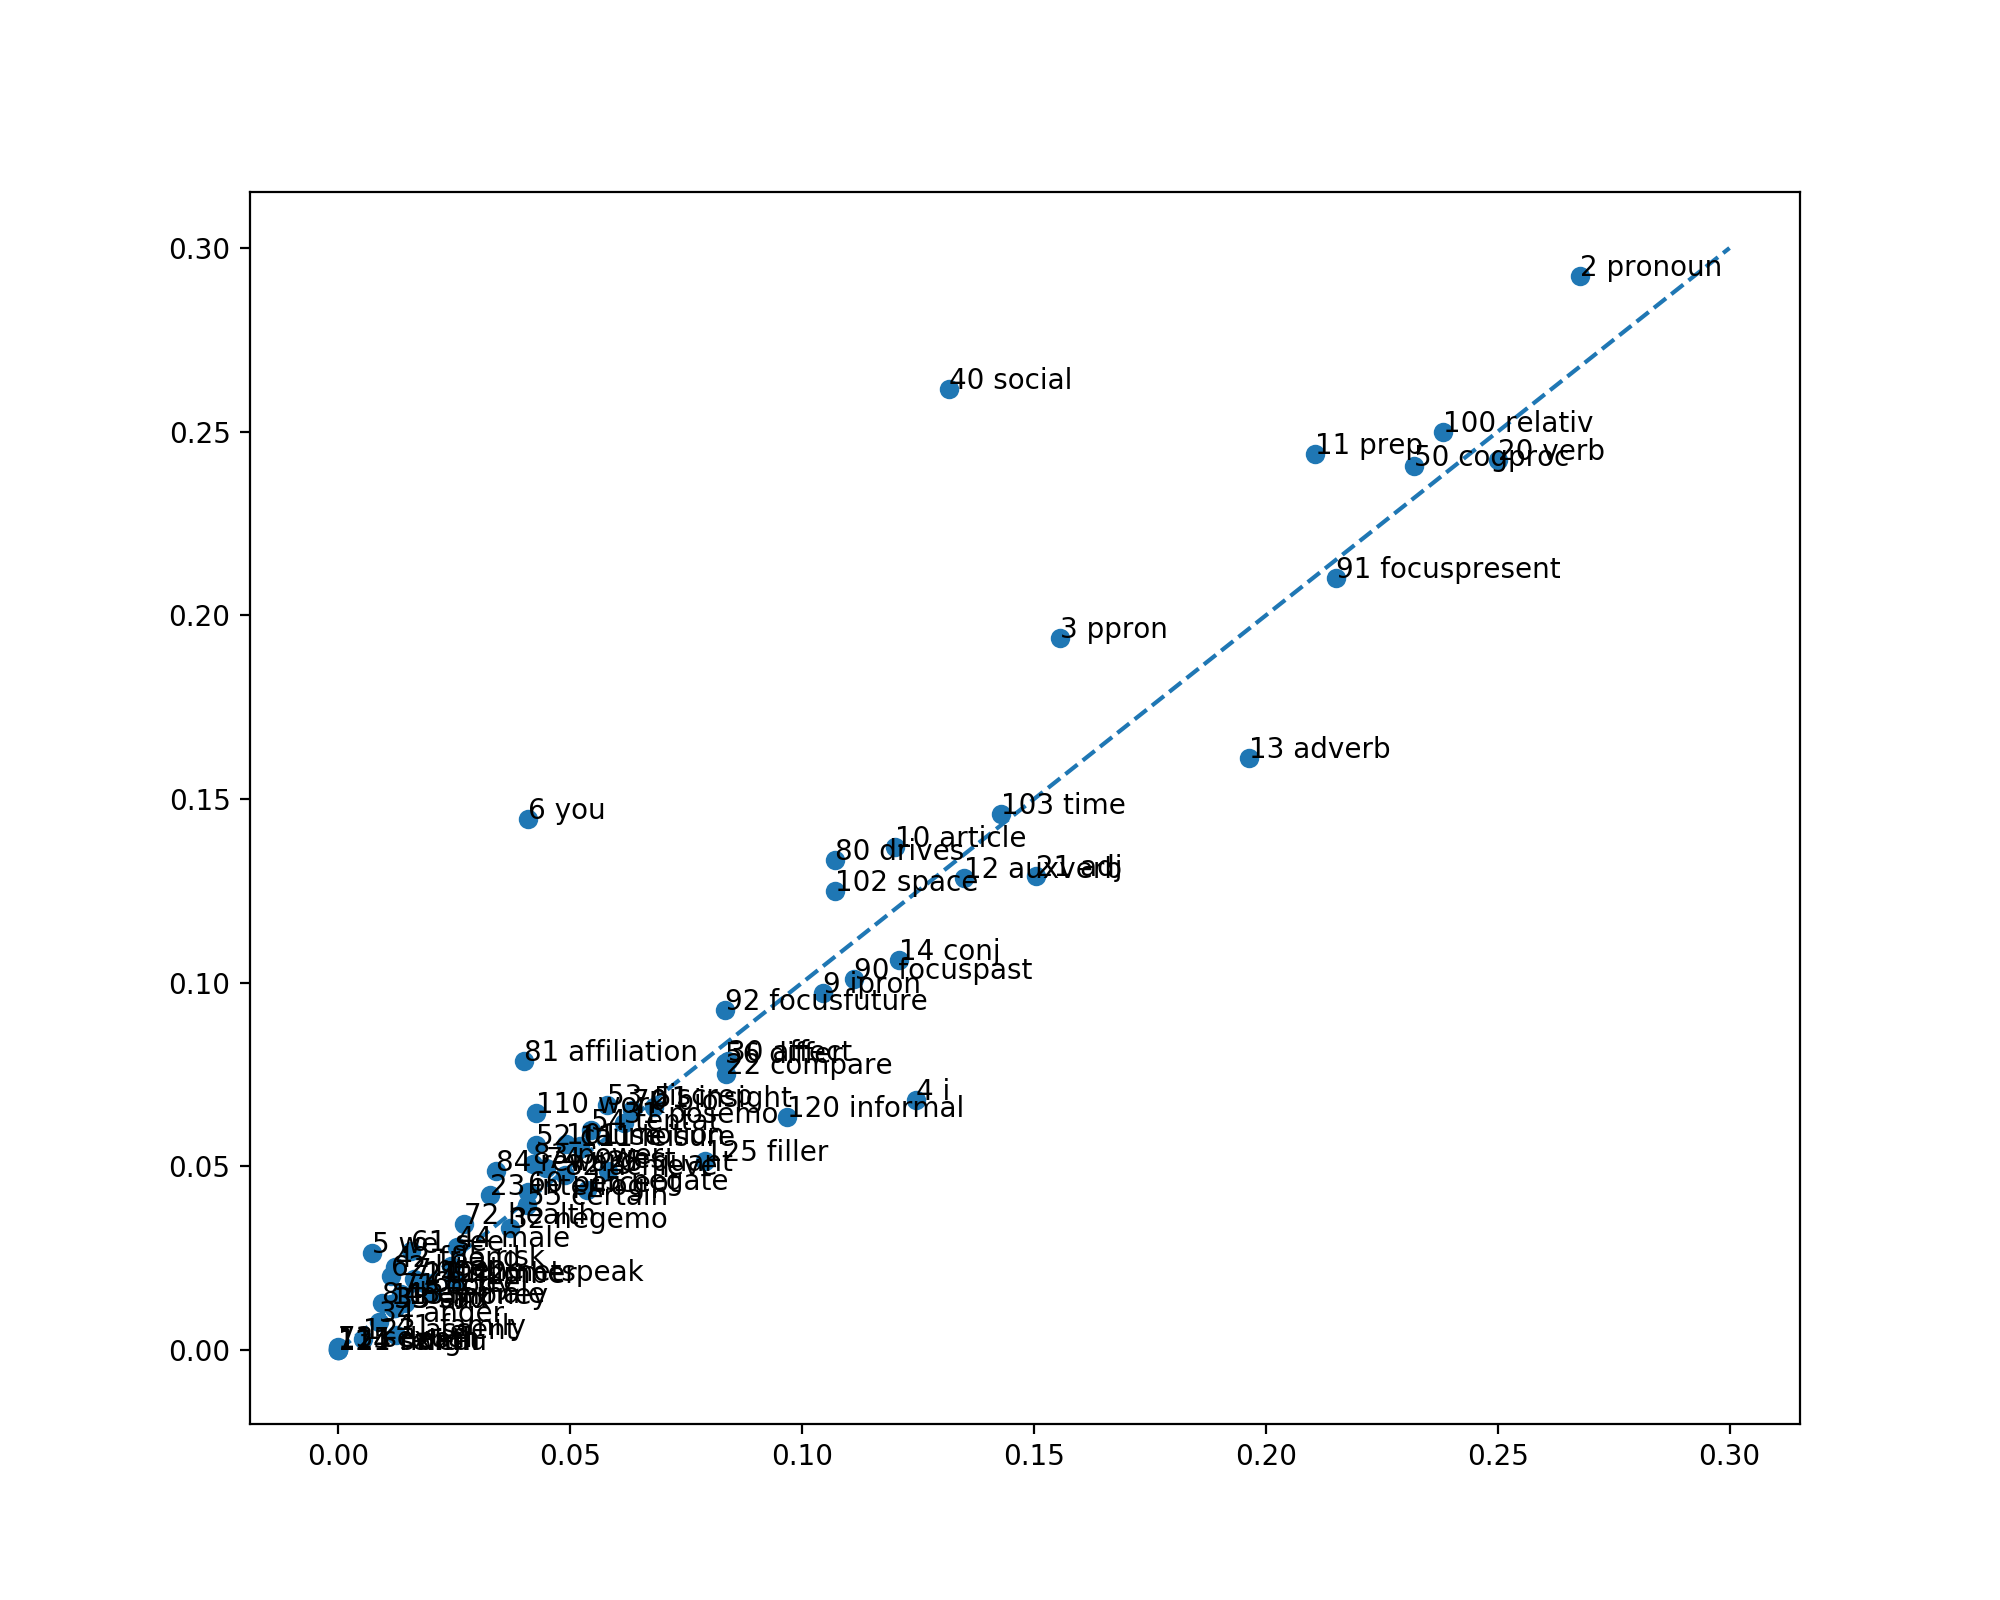

[]

In [4]:
clientMedians = []
counselorMedians = []
labels = []
for feature in dataOut["AdB0001"]:
    if re.match("^\d.*$",feature) and not re.match("^1 .*$",feature):
        counselor = {c:dataOut[c][feature][COUNSELOR] for c in dataOut  if CLIENT in dataOut[c][feature]}
        client = {c:dataOut[c][feature][CLIENT] for c in dataOut if CLIENT in dataOut[c][feature]}
        clientMedians.append(np.median([float(x) for x in client.values()]))
        counselorMedians.append(np.median([float(x) for x in counselor.values()]))
        labels.append(feature)
fig,ax = plt.subplots(figsize=(10, 8))
ax.scatter(clientMedians,counselorMedians)
for i in range(0,len(clientMedians)):
    ax.annotate(labels[i],[clientMedians[i],counselorMedians[i]])
x = np.linspace(0,0.3, 1000)
plt.plot(x, x, linestyle='dashed')
plt.rc({'font':{"size":"14"}})
plt.plot()